   userId  movieId                        title  \
0       1        1             Toy Story (1995)   
1       1        3      Grumpier Old Men (1995)   
2       1        6                  Heat (1995)   
3       1       47  Seven (a.k.a. Se7en) (1995)   
4       1       50   Usual Suspects, The (1995)   

                                        genres  year  rating  timestamp  
0  Adventure|Animation|Children|Comedy|Fantasy  1995     4.0  964982703  
1                               Comedy|Romance  1995     4.0  964981247  
2                        Action|Crime|Thriller  1995     4.0  964982224  
3                             Mystery|Thriller  1995     5.0  964983815  
4                       Crime|Mystery|Thriller  1995     5.0  964982931  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100818 entries, 0 to 100817
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100818 non-null  int64  
 1   movieId    

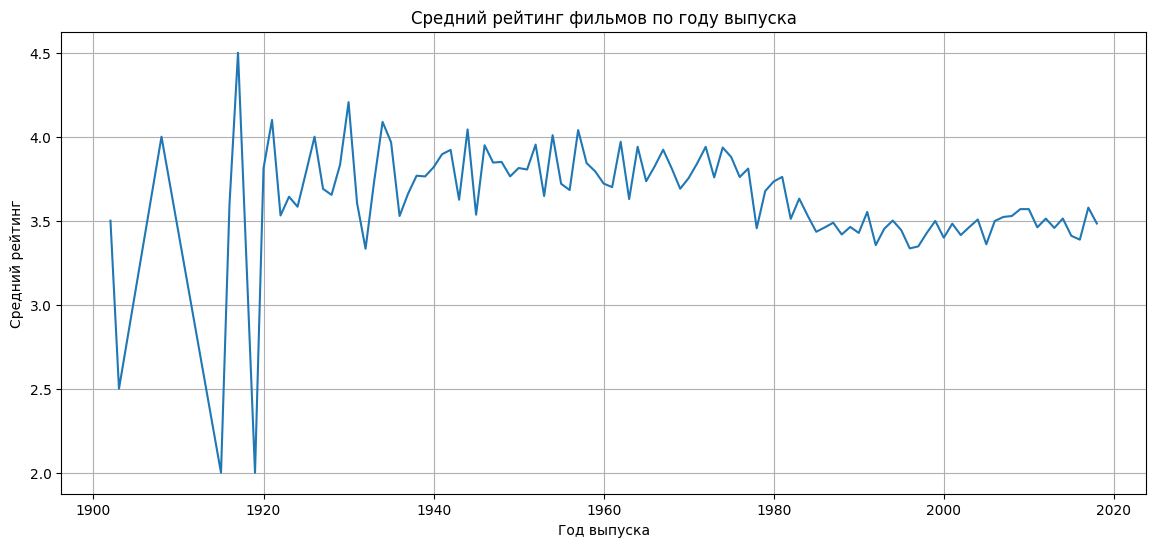

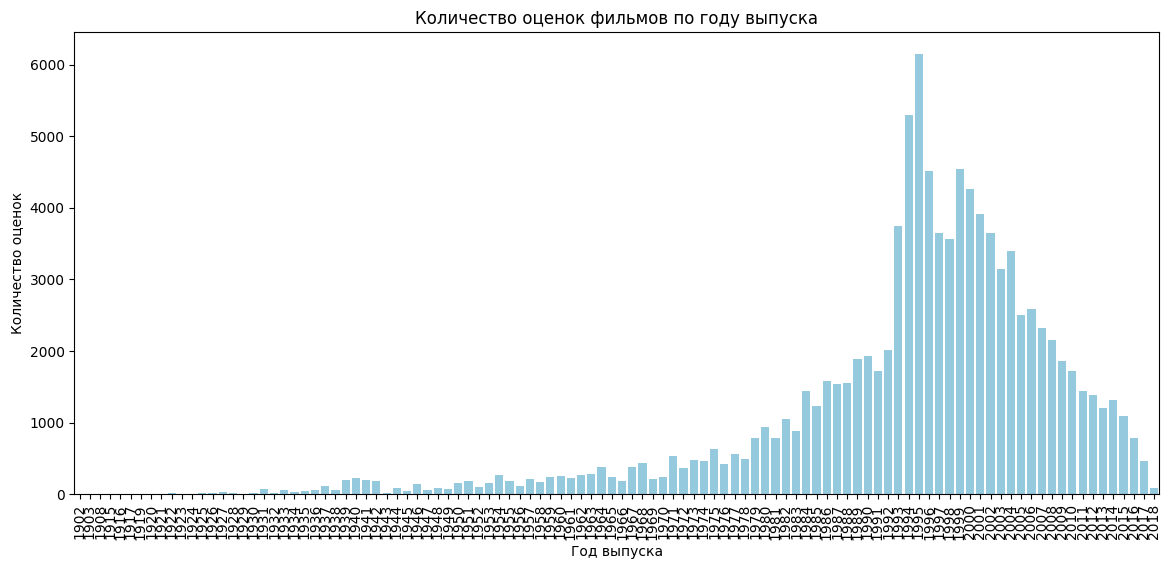

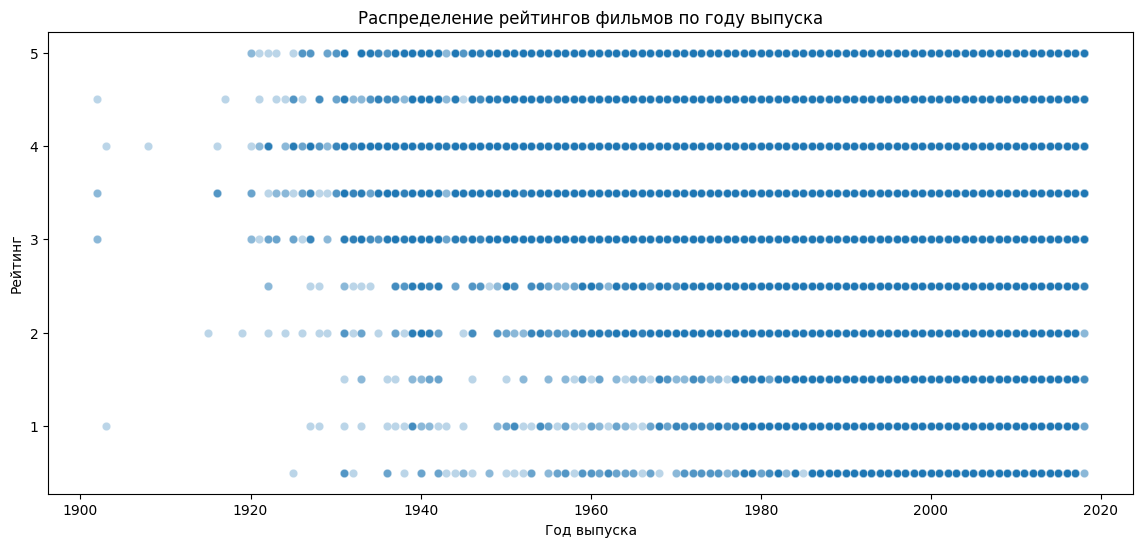

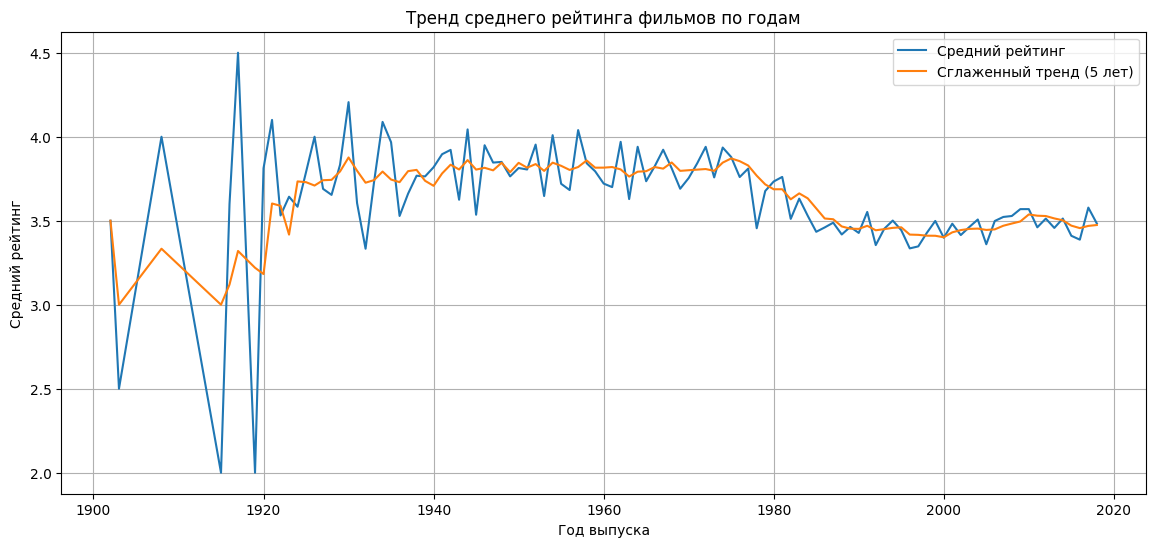

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка подготовленных данных
df = pd.read_csv('../data/movies_with_ratings.csv')

# Проверяем данные
print(df.head())
print(df.info())
print(df['year'].describe())

# Группировка по году выпуска
yearly_stats = df.groupby('year')['rating'].agg(['mean', 'count']).reset_index()
yearly_stats = yearly_stats.sort_values('year')

# Просмотр первых строк
print(yearly_stats.head())

# 🔹 Визуализация 1: средний рейтинг по годам
plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_stats, x='year', y='mean')
plt.title('Средний рейтинг фильмов по году выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()

# 🔹 Визуализация 2: количество оценок по годам
plt.figure(figsize=(14,6))
sns.barplot(data=yearly_stats, x='year', y='count', color='skyblue')
plt.xticks(rotation=90)
plt.title('Количество оценок фильмов по году выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество оценок')
plt.show()

# 🔹 Визуализация 3: Scatterplot рейтинги vs год (распределение)
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='year', y='rating', alpha=0.3)
plt.title('Распределение рейтингов фильмов по году выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Рейтинг')
plt.show()

# 🔹 Сглаженный тренд
yearly_stats['mean_smooth'] = yearly_stats['mean'].rolling(5, min_periods=1).mean()

plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_stats, x='year', y='mean', label='Средний рейтинг')
sns.lineplot(data=yearly_stats, x='year', y='mean_smooth', label='Сглаженный тренд (5 лет)')
plt.title('Тренд среднего рейтинга фильмов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.legend()
plt.show()
